In [27]:
%matplotlib inline

In [28]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

## Linear regresion
### first steps

####  linear eaqution or eqation of line
linear eqaution is defined as $y(x) = ax + b $ where a is the slope of line $\tan{(\phi)}$ b charctarise is the interseption

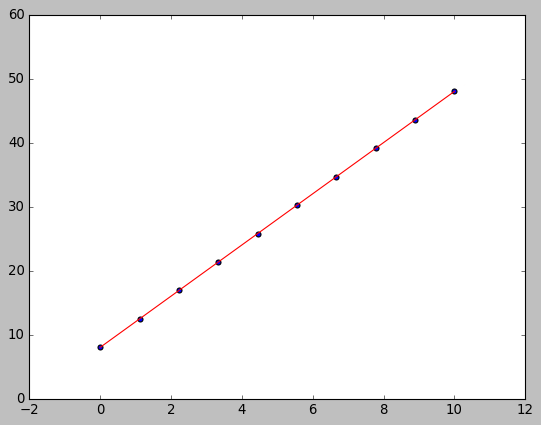

In [29]:
y_f = lambda x,a=69,b=4 : x*a+b
x_data = np.linspace(0,10,10)
#a = np.vectorize(y,x)
#y_data = [y(x,1,2) for x in x_data ]

y_data = y_f(x_data,4,8)

plt.scatter(x_data,y_data)
plt.plot(x_data,y_data,color='r')

#### let to define the linear eaqution with some noise



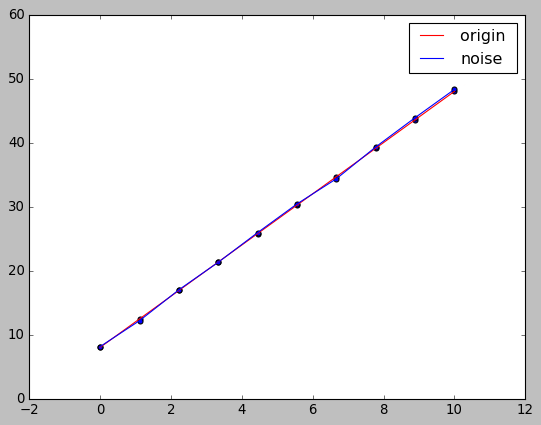

In [30]:
noise_data =np.array( [np.random.uniform(-0.5,0.5) for i in range(len(x_data))] )
# print(len(noise_data))
# print(len(x_data))
# print(type(noise_data))
# print(type(x_data))

y_data_n = y_data+noise_data

plt.scatter(x_data,y_data)
plt.plot(x_data,y_data,color='r',label = 'origin ')
plt.scatter(x_data,y_data_n)
plt.plot(x_data,y_data_n,color='b',label = 'noise')
plt.legend()
plt.show()

### cost function

Let’s do an analysis using the squared error cost function.

$$ C(a,b) = \frac{1}{2m}\sum_{i}^m(y_i - \hat{y_i})^2 $$

In [31]:
y_data = y_data_n


"""
That is the simple example of power of numpy
just to see how numpy array work with '**' and '*' and 'sum' operators
r = np.array([1,2,3])
r1 = r**2
print(r1)
r3 = (r1+r1)**2
print(r3)
print(sum(r3))

"""

    

def cost_funct(x,y,a,b):
    """
    cost function for calculation quadratic error
    """
    y_predict = y_f(x,a,b)  ## return np.array of predict result with given a , b
    #print(y_predict)
    #print(y)
    size = len(x)
    cost = (y-y_predict)**2
    return sum(cost)/(2*size)
    
    
def calculate_loss(x, y, a, b):
    y_predicted = a * x + b
    distances = (y - y_predicted) ** 2
    return np.sum(distances) / len(x)
  

In [32]:
print(cost_funct(x_data,y_data,1,2))    
print(cost_funct(x_data,y_data,1,-2))   
print(cost_funct(x_data,y_data,1,4))   
print(cost_funct(x_data,y_data,1,2))   
print(cost_funct(x_data,y_data,3,3))  

268.9270023239694
361.2396795206301
228.77066372563905
268.9270023239694
56.20875071214391


$$\frac{\partial{C}}{\partial{a}}=\sum_i^n2x(y_i-\hat{y_i})$$
$$\frac{\partial{C}}{\partial{b}}=\sum_i^n2(y_i-\hat{y_i})$$


## lets first to do some explorion of function C(a,b)







No handles with labels found to put in legend.


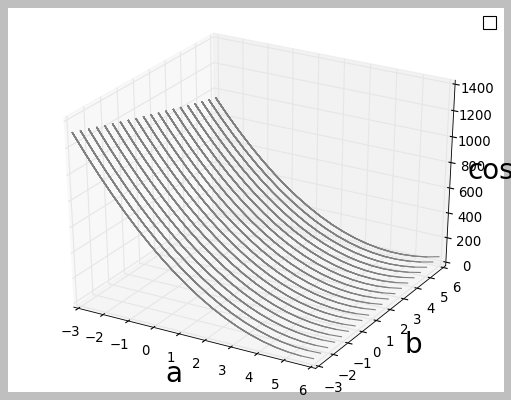

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z = np.linspace(-3,6,20)

for b in z:
    z_line = []
    x_line = []
    y_line = []
    for a in z:
      c  =  cost_funct(x_data,y_data,a,b)
      x_line.append(a)
      y_line.append(b)  
      z_line.append(c)
      ax.plot3D(x_line, y_line, z_line, 'gray')  
      
      label = 'b={}'.format(b)
    #print(p," ",j)
    #plt.plot(j,p,label = label )
   
    
    #Axes3D.plot(j, p,p)
    
ax.set_xlabel('a',fontsize=25)
ax.set_ylabel('b',fontsize=25)
ax.set_zlabel('cost',fontsize=25)
plt.legend()


## not so clear from graphic we  can see  that the min value of cost is around a=3 b=3

In [34]:
# y= a*x +b
def grad(x_data,y_data,a,b):
    size = len(x_data)
    grad_a = (a/size)*sum((a*x_data+b - y_data))
    grad_b = (1/size)*sum((a*x_data+b - y_data))
    
def calculate_gradient_d(x_data,y_data):
    a,b =-10,10
    alpha=0.01 # step size #learning size integration step
    
    

In [35]:
#y_f = lambda x,a=2,b=4 : x*a+b


def perform_gradient_descent(x, y, a, b, learning_rate):
    a_gradient = -2 / len(x) * np.sum(x * (y - (a * x + b)))
    b_gradient = -2 / len(y) * np.sum(y - (a * x + b))
    new_a = a - a_gradient * learning_rate
    new_b = b - b_gradient * learning_rate
    print("step a,b " ,new_a," ",new_b)
    return (new_a, new_b)



In [37]:
model_a, model_b = -10, 20 # Start points; can be anywhere
alpha = 0.01 # Learning rate
for step in range(1001):
    model_a, model_b = perform_gradient_descent(x_data, y_data, model_a, model_b, alpha)
    if step % 100 == 0:
        error = calculate_loss(x_data, y_data, model_a, model_b)
        print("Step {}: a = {}, b = {}, J = {}".format(step, model_a, model_b, error))
print("Final line: {} * x + {}".format(model_a, model_b)) 


step a,b  -1.334154732428951   21.161563385983303
Step 0: a = -1.334154732428951, b = 21.161563385983303, J = 477.75786750616805
step a,b  1.1173467860308057   21.433310977489835
step a,b  1.8165428471645253   21.454473465320262
step a,b  2.021595801680362   21.40529309728071
step a,b  2.087270269451973   21.33659104115036
step a,b  2.1135995766269664   21.26269557936546
step a,b  2.1287903990054544   21.187645096098755
step a,b  2.140796431740566   21.11257654025954
step a,b  2.1518606303571133   21.037808752263594
step a,b  2.1626156902282774   20.963429900165913
step a,b  2.173240259844316   20.88946311912307
step a,b  2.1837849585755746   20.81591321673948
step a,b  2.194264303993566   20.74277984253044
step a,b  2.2046826326494307   20.670061201263778
step a,b  2.215041408970427   20.597755099956863
step a,b  2.2253412861591917   20.525859243043985
step a,b  2.235582687313817   20.45437131555049
step a,b  2.2457659692941667   20.383289006491403
step a,b  2.2558914689349936   20.31

step a,b  3.931199773241075   8.618459803423823
step a,b  3.9317621830037988   8.614534016014543
step a,b  3.932321401674422   8.610630503377177
step a,b  3.9328774473590844   8.606749139125494
step a,b  3.9334303380611897   8.602889797590379
step a,b  3.933980091681992   8.599052353815756
step a,b  3.9345267260211734   8.595236683554544
step a,b  3.9350702587774222   8.59144266326464
step a,b  3.9356107075490048   8.587670170104909
step a,b  3.936148089834336   8.583919081931214
step a,b  3.9366824230325443   8.58018927729246
step a,b  3.937213724444037   8.576480635426659
step a,b  3.9377420112710593   8.572793036257025
step a,b  3.9382673006182514   8.569126360388081
step a,b  3.938789609493203   8.565480489101798
step a,b  3.9393089548070015   8.561855304353745
step a,b  3.9398253533747845   8.558250688769274
step a,b  3.9403388219162783   8.554666525639714
step a,b  3.940849377056344   8.551102698918596
step a,b  3.941357035325512   8.547559093217894
step a,b  3.941861813160521   

step a,b  4.019044477632847   8.005277641003337
step a,b  4.019108459806373   8.00483102640329
step a,b  4.019172078947422   8.00438694587789
step a,b  4.019235337115828   8.003945385048894
step a,b  4.019298236359736   8.003506329619636
step a,b  4.019360778715672   8.003069765374573
step a,b  4.019422966208604   8.002635678178818
step a,b  4.019484800852012   8.002204053977684
step a,b  4.019546284647949   8.001774878796232
step a,b  4.019607419587113   8.001348138738816
step a,b  4.019668207648903   8.000923819988632
step a,b  4.019728650801489   8.000501908807273
step a,b  4.019788751001872   8.000082391534281
step a,b  4.019848510195952   7.999665254586712
step a,b  4.019907930318585   7.999250484458686
step a,b  4.019967013293648   7.998838067720957
step a,b  4.020025761034107   7.998427991020477
step a,b  4.020084175442069   7.99802024107996
step a,b  4.02014225840885   7.997614804697458
step a,b  4.020200011815035   7.997211668745927
step a,b  4.02025743753054   7.9968108201728

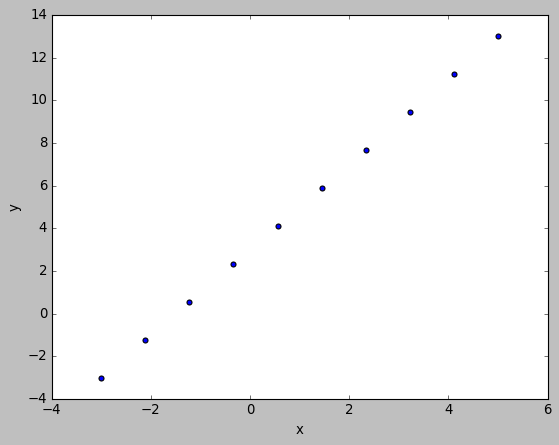

In [12]:
x = np.linspace(-3, 5, 10)
y = 2 * x + 3
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


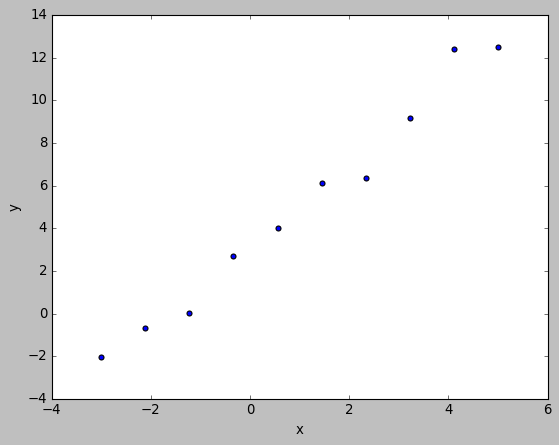

In [49]:
y_noise = np.random.normal(size = len(y))
y_with_noise = y + y_noise
plt.scatter(x, y_with_noise)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


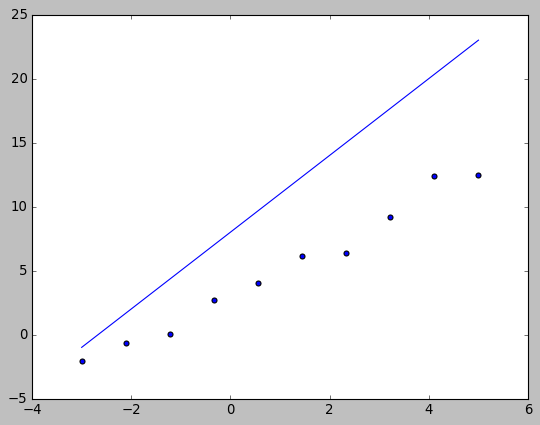

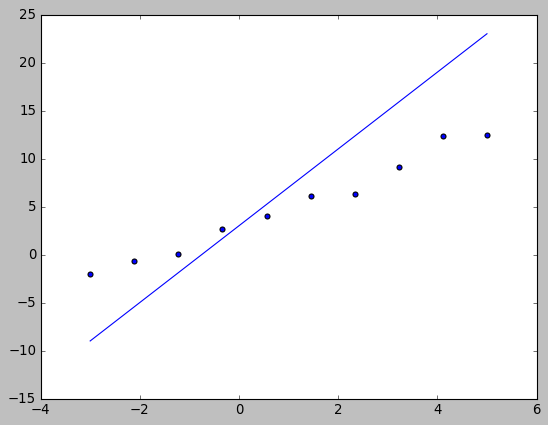

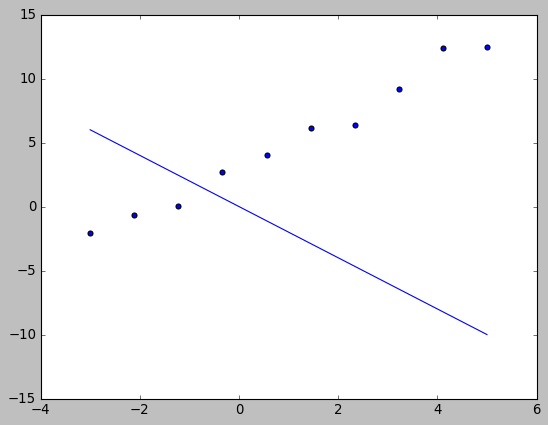

In [50]:
for y_guess in [3 * x + 8, 4 * x + 3, -2 * x]:
  plt.scatter(x, y_with_noise)
  plt.plot(x, y_guess)
  plt.show()


In [52]:
def calculate_loss(x, y, a, b):
    y_predicted = a * x + b
    distances = (y - y_predicted) ** 2
    return np.sum(distances) / len(x)


In [53]:
a_gradient = -2 / len(x) * np.sum(x * (y - (a * x + b)))
b_gradient = -2 / len(y) * np.sum(y - (a * x + b))


In [54]:
def perform_gradient_descent(x, y, a, b, learning_rate):
    a_gradient = -2 / len(x) * np.sum(x * (y - (a * x + b)))
    b_gradient = -2 / len(y) * np.sum(y - (a * x + b))
    new_a = a - a_gradient * learning_rate
    new_b = b - b_gradient * learning_rate
    return (new_a, new_b)


In [56]:
def perform_gradient_descent(x, y, a, b, learning_rate):
    a_gradient = -2 / len(x) * np.sum(x * (y - (a * x + b)))
    b_gradient = -2 / len(y) * np.sum(y - (a * x + b))
    new_a = a - a_gradient * learning_rate
    new_b = b - b_gradient * learning_rate
    return (new_a, new_b)
    

In [64]:
model_a, model_b = -10, 20 # Start points; can be anywhere
alpha = 0.01 # Learning rate
for step in range(1001):
    model_a, model_b = perform_gradient_descent(x, y, model_a, model_a, alpha)
    if step % 100 == 0:
        error = calculate_loss(x_data, y_data, model_a, model_a)
        print("Step {}: a = {}, b = {}, J = {}".format(step, model_a, model_b, error))
print("Final line: {} * x + {}".format(model_a, model_b)) 

Step 0: a = -7.935555555555555, b = -9.5, J = 5521.722649983318
Step 100: a = 2.117391226594531, b = 2.132695562202243, J = 35.927922911009695
Step 200: a = 2.117391304347825, b = 2.132695652173912, J = 35.927916582435344
Step 300: a = 2.117391304347825, b = 2.132695652173912, J = 35.927916582435344
Step 400: a = 2.117391304347825, b = 2.132695652173912, J = 35.927916582435344
Step 500: a = 2.117391304347825, b = 2.132695652173912, J = 35.927916582435344
Step 600: a = 2.117391304347825, b = 2.132695652173912, J = 35.927916582435344
Step 700: a = 2.117391304347825, b = 2.132695652173912, J = 35.927916582435344
Step 800: a = 2.117391304347825, b = 2.132695652173912, J = 35.927916582435344
Step 900: a = 2.117391304347825, b = 2.132695652173912, J = 35.927916582435344
Step 1000: a = 2.117391304347825, b = 2.132695652173912, J = 35.927916582435344
Final line: 2.117391304347825 * x + 2.132695652173912
